In [2]:
import numpy as np
import pandas as pd
#from sklearn import datasets

# Let's import the data from sklearn
#from sklearn.datasets import load_wine
#wine_db=load_wine()
landslide_db=pd.read_csv('landslide.csv')
#Conver to pandas dataframe
#landslide=pd.DataFrame(data=np.c_[landslide_db['data'],landslide_db['target']],columns=landslide_db['feature_names']+['target'])
print(landslide_db)
#Check data with info function
#landslide.info()

      Landslide  Aspect  Curvature  Earthquake  Elevation  Flow  Lithology  \
0             0       3          3           2          2     2          1   
1             0       1          5           2          3     1          1   
2             0       3          4           3          2     2          4   
3             0       1          3           3          3     5          1   
4             0       5          4           2          1     4          1   
...         ...     ...        ...         ...        ...   ...        ...   
1207          1       4          2           1          4     2          5   
1208          1       4          5           1          5     3          5   
1209          1       3          4           1          5     2          5   
1210          1       2          2           1          3     1          1   
1211          1       3          4           1          3     2          1   

      NDVI  NDWI  Plan  Precipitation  Profile  Slope  
0      

In [3]:
from sklearn.model_selection import train_test_split

X = landslide_db.drop('Landslide', axis=1)
y = landslide_db['Landslide']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [4]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)

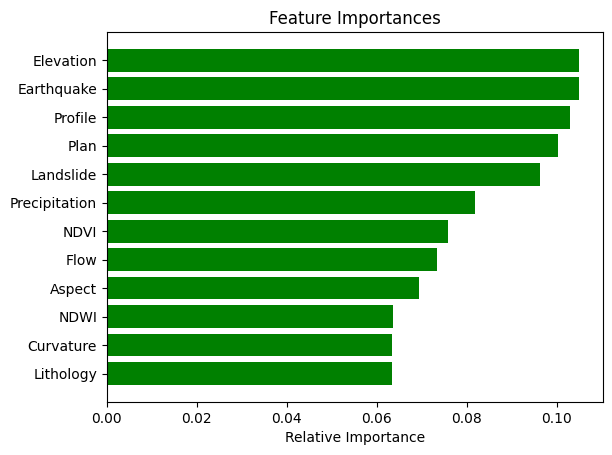

In [5]:
import matplotlib.pyplot as plt
importances = model.feature_importances_
indices = np.argsort(importances)
features = landslide_db.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [6]:
y.value_counts()


Landslide
0    606
1    606
Name: count, dtype: int64

In [7]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 6.4 MB/s eta 0:00:00


In [8]:
import shap
# compute SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

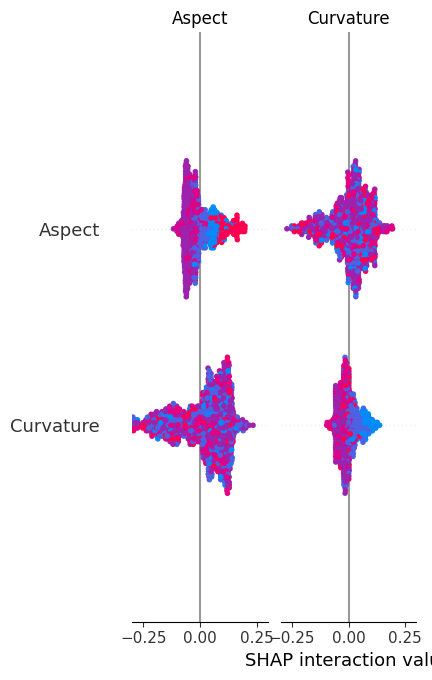

In [9]:
shap.summary_plot(shap_values, X.values, plot_type="bar", class_names= [0,1,2], feature_names = X.columns)

In [10]:
# summary_plot of a specific class
shap.summary_plot(shap_values[1], X.values, feature_names = X.columns)

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [ ]:
# ------------SHAP Dependence Plot----------------
# A dependence plot is a scatter plot that shows the effect a single feature has on the predictions made by the model.
# If we pass a numpy array instead of a data frame then we
# need pass the feature names in separately
shap.dependence_plot(0, shap_values[0], X.values, feature_names=X.columns)

IndexError: index 12 is out of bounds for axis 0 with size 12

In [ ]:
# -------------------SHAP Force plot--------------------------------
# Force plot gives us the explainability of a single model prediction.
i=8
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][i], X.values[i], feature_names = X.columns)

DimensionError: Length of features is not equal to the length of shap_values!

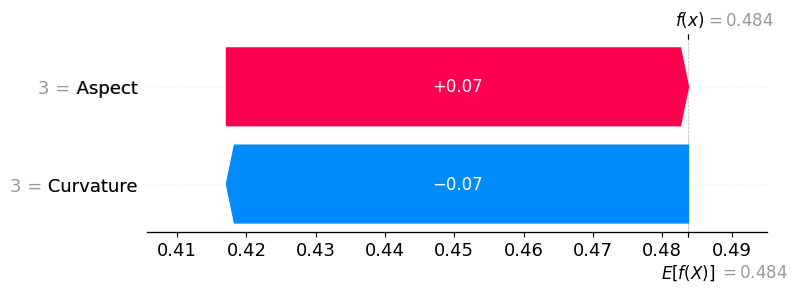

In [ ]:
# ----------------------SHAP waterfall plot-------------------------------------
# The waterfall plot is another local analysis plot of a single instance prediction.
row = 8
shap.waterfall_plot(shap.Explanation(values=shap_values[0][row],
                                              base_values=explainer.expected_value[0], data=X_test.iloc[row],
                                         feature_names=X_test.columns.tolist()))